In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import re
from scipy import stats
from pathlib import Path

# directory and file paths
data_dir = Path("../data/")
processed_data_dir = data_dir / "processed"

housing_file = processed_data_dir / "census_housing.csv"
covid_file = processed_data_dir / "COVID-19_Cases.csv"
covid_geo_file = processed_data_dir / "COVID-19_Cases_Geo.csv"

# COVID-19 Data Visualization

In [2]:
geo = pd.read_csv(covid_geo_file)
monthly_cases = geo[["case_month","case","hosp","icu","death"]].groupby("case_month").sum()
monthly_cases

,case,hosp,icu,death
case_month,,,,
2020-01,3138,237,28,0
2020-02,4637,1629,260,139
2020-03,367172,86769,15091,17556
2020-04,783108,130384,14694,54453
2020-05,667240,56675,6900,14047
2020-06,880515,51935,5896,6413
2020-07,1376217,77482,7822,12776
2020-08,1029874,48855,4792,7248
2020-09,1048243,40173,3837,4080


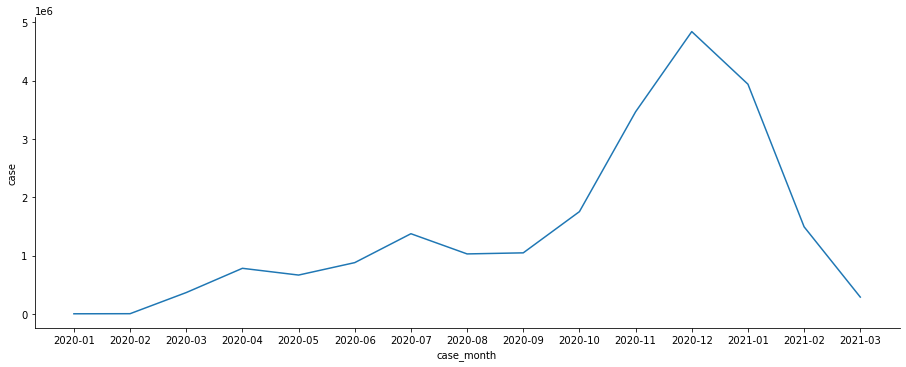

In [3]:
sns.relplot(data=monthly_cases,x=monthly_cases.index,y="case",kind="line",height=5,aspect=2.5)

In [4]:
geo.head()

,case_month,hosp,icu,death,race,ethnicity,cbsa_title,state,county,county_fips_code,case
0,2020-01,0,0,0,NaN,NaN,NaN,NaN,NaN,0,1
1,2020-01,0,0,0,NaN,NaN,NaN,NaN,NaN,0,1
2,2020-01,0,0,0,NaN,NaN,NaN,NaN,NaN,0,1
3,2020-01,0,0,0,NaN,NaN,NaN,NaN,NaN,0,1
4,2020-01,0,0,0,NaN,NaN,NaN,NaN,NaN,0,1


In [5]:
cases_by_state = geo.pivot_table('case',columns='case_month',index='state',aggfunc=sum).fillna(0).astype(int)
cm = sns.color_palette("flare", as_cmap=True)
cases_by_state.style.background_gradient(cmap=cm)
#sns.heatmap(cases_by_race,cmap="rocket_r")

case_month,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03
state,,,,,,,,,,,,,,,
Alabama,0,0,2133,3951,6309,15739,39209,31198,23695,31447,50119,80407,81607,27487,5056
Alaska,0,0,194,123,79,447,1919,1733,2597,7135,13488,7973,4013,2612,686
Arizona,141,39,2624,6562,14577,69966,85493,22409,16409,32266,101845,213985,197014,43795,7060
Arkansas,0,0,724,1285,3891,11576,16335,12846,14605,16997,29641,40826,35311,9956,1063
California,418,388,18660,45888,70213,169369,281301,148954,98623,119628,391347,1148534,824684,168402,18888
Colorado,0,11,6226,11487,8564,5789,13534,9210,4991,10912,91212,83326,51079,27942,6354
Connecticut,0,0,3677,9167,3578,29613,3928,3451,4475,15985,39976,58119,35953,0,0
Delaware,0,0,290,4116,4255,1880,2988,2333,2842,4120,10502,20734,19401,8130,1382
Florida,62,157,15203,19718,19876,78546,128279,140829,104755,124463,79769,104690,172370,105739,36704
